 **Trabalho 3 - Aprendizado de máquina** \\

**dataset** - EMNIST \\
**URL**: https://www.kaggle.com/datasets/crawford/emnist/code \\
**Nomes**: José David Melo dos Santos, Alícia Maria Gualberto Lima


**Descrição do dataset**: O conjunto de dados EMNIST é um conjunto de dígitos de caracteres manuscritos derivados do NIST Special Database 19 e convertidos em um formato de imagem de 28x28 pixels e estrutura de conjunto de dados que corresponde diretamente ao conjunto de dados MNIST.


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import pandas as pd

In [ ]:
train_data = pd.read_csv('/content/emnist-balanced-train.csv')
test_data = pd.read_csv('/content/emnist-balanced-test.csv')
label_map = pd.read_csv('/content/emnist-balanced-mapping.txt', sep='\s+', header=None)

# Análise de dados

In [ ]:
train_data.head()

,45,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.524,0.525,0.526,0.527,0.528,0.529,0.530,0.531,0.532,0.533
0,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,43,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,42,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Temos que, a primeira coluna é a informação numérica do caractere e as outras colunas são os pixels das imagens. Cada imagem contém 28x28 pixels que, no caso nos da 784 pixels, por isso temos 784 colunas de pixels

In [ ]:
label = train_data.iloc[0,0]
image = train_data.iloc[0,1:].values.reshape(28,28)

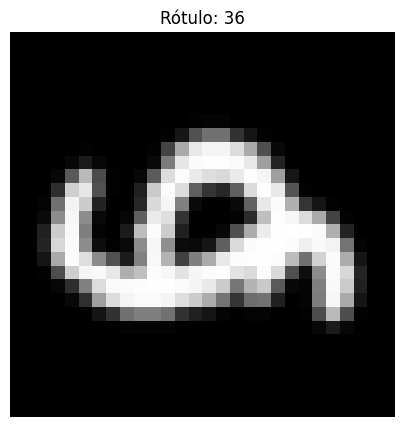

In [ ]:
plt.figure(figsize=(5,5))
plt.imshow(image, cmap='gray')

plt.title(f'Rótulo: {label}')
plt.axis('off')
plt.show()

x_train é um array numpy que contém apenas os valores de pixel de todas as imagens do dataset de treino

y_train contém os rótulos

# Pré-processamento de dados

In [ ]:
X = np.array(train_data.iloc[:,1:].values)
y = np.array(train_data.iloc[:,0].values)

36 na tabela ascii é a letra a

In [ ]:
X.shape

(112799, 784)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

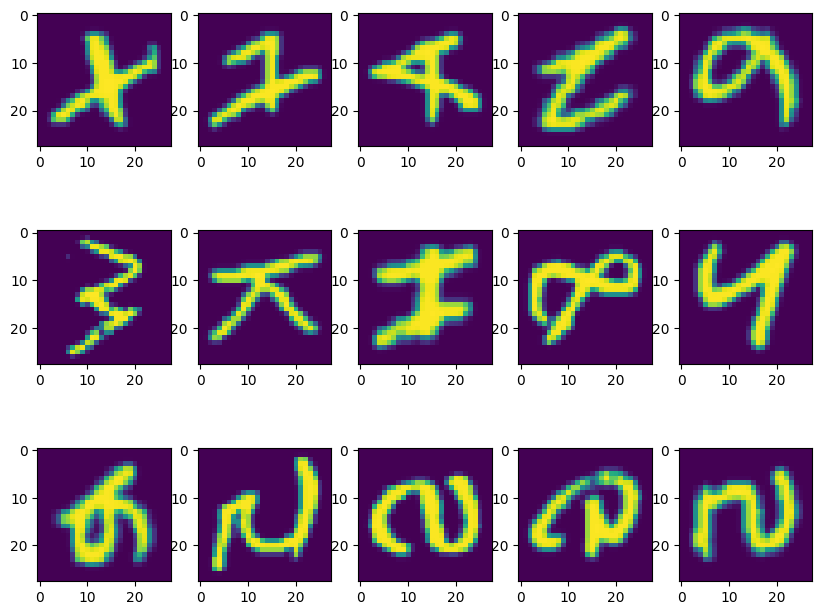

In [ ]:
fig, axes = plt.subplots(3,5,figsize=(10,8))
for i,ax in enumerate(axes.flat):
    ax.imshow(X_train[i].reshape([28,28]))

In [ ]:
def rotate_image(image):
  image = image.reshape(28,28)
  image = np.fliplr(image)
  image = np.rot90(image)

  return image

In [ ]:
X_train = np.apply_along_axis(rotate_image, 1, X_train)
X_test = np.apply_along_axis(rotate_image, 1, X_test)

rotate_image será aplicada uma vez para cada imagem de X_train

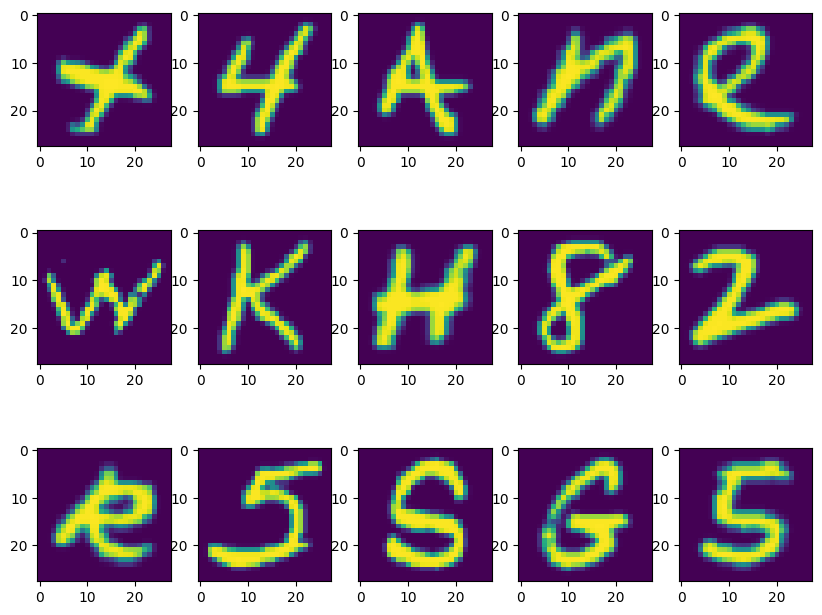

In [ ]:
fig, axes = plt.subplots(3,5,figsize=(10,8))
for i,ax in enumerate(axes.flat):
    ax.imshow(X_train[i].reshape([28,28]))

Reformulando as dimensões dos arrays para que seja possível trabalhar em um modelo de aprendizado de máquina

In [ ]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

convertendo os rótulos em uma representação de one-hot encoded

In [ ]:
y_train = to_categorical(y_train, 47)
y_test = to_categorical(y_test, 47)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input
from keras.layers import Dense, Flatten

In [ ]:
model = Sequential()
model.add(Input(shape=(28, 28, 1))) #formato das entradas são imagens 28x28 em escala de cinza
model.add(Flatten()) #Transforma essa matriz 2D em um vetor unidimensional (1D), pois as camadas densas só aceitam dados unidimensionais
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(47, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 47)                  │           6,063 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 123,055 (480.68 KB)

 Trainable params: 123,055 (480.68 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Utilizar diferentes variações nos dados de testes para reduzir riscos de overfitting

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=5,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False,
    vertical_flip=False
)

datagen.fit(X_train)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stopping_monitor = EarlyStopping(patience=5)

In [ ]:
history1 = model.fit(datagen.flow(X_train, y_train, batch_size=128),
                    epochs=20,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping_monitor])

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


705/705 ━━━━━━━━━━━━━━━━━━━━ 46s 62ms/step - accuracy: 0.0472 - loss: 12.9072 - val_accuracy: 0.1332 - val_loss: 3.2924
Epoch 2/20
705/705 ━━━━━━━━━━━━━━━━━━━━ 43s 60ms/step - accuracy: 0.1246 - loss: 3.2957 - val_accuracy: 0.2242 - val_loss: 2.7835
Epoch 3/20
705/705 ━━━━━━━━━━━━━━━━━━━━ 43s 61ms/step - accuracy: 0.2009 - loss: 2.9154 - val_accuracy: 0.3205 - val_loss: 2.3800
Epoch 4/20
705/705 ━━━━━━━━━━━━━━━━━━━━ 42s 59ms/step - accuracy: 0.2890 - loss: 2.5301 - val_accuracy: 0.4179 - val_loss: 1.9004
Epoch 5/20
705/705 ━━━━━━━━━━━━━━━━━━━━ 43s 60ms/step - accuracy: 0.3627 - loss: 2.1952 - val_accuracy: 0.5002 - val_loss: 1.6577
Epoch 6/20
705/705 ━━━━━━━━━━━━━━━━━━━━ 42s 60ms/step - accuracy: 0.4270 - loss: 1.9561 - val_accuracy: 0.5560 - val_loss: 1.4233
Epoch 7/20
705/705 ━━━━━━━━━━━━━━━━━━━━ 82s 59ms/step - accuracy: 0.4679 - loss: 1.7838 - val_accuracy: 0.5700 - val_loss: 1.3660
Epoch 8/20
705/705 ━━━━━━━━━━━━━━━━━━━━ 42s 60ms/step - accuracy: 0.5011 - loss: 1.6556 - val_accura

#TESTE 2

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout

model = Sequential()
model.add(Input(shape=(28, 28, 1)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Dropout para evitar overfitting
model.add(Dense(47, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 47)                  │          12,079 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 399,919 (1.53 MB)

 Trainable params: 399,919 (1.53 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history2 = model.fit(datagen.flow(X_train, y_train, batch_size=128),
                    epochs=20,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping_monitor])

Epoch 1/20
705/705 ━━━━━━━━━━━━━━━━━━━━ 128s 179ms/step - accuracy: 0.3256 - loss: 3.7782 - val_accuracy: 0.8246 - val_loss: 0.5178
Epoch 2/20
705/705 ━━━━━━━━━━━━━━━━━━━━ 123s 175ms/step - accuracy: 0.7330 - loss: 0.8460 - val_accuracy: 0.8468 - val_loss: 0.4361
Epoch 3/20
705/705 ━━━━━━━━━━━━━━━━━━━━ 122s 172ms/step - accuracy: 0.7787 - loss: 0.6779 - val_accuracy: 0.8534 - val_loss: 0.4142
Epoch 4/20
705/705 ━━━━━━━━━━━━━━━━━━━━ 144s 175ms/step - accuracy: 0.8028 - loss: 0.5954 - val_accuracy: 0.8531 - val_loss: 0.4146
Epoch 5/20
705/705 ━━━━━━━━━━━━━━━━━━━━ 122s 173ms/step - accuracy: 0.8102 - loss: 0.5677 - val_accuracy: 0.8625 - val_loss: 0.3794
Epoch 6/20
705/705 ━━━━━━━━━━━━━━━━━━━━ 144s 175ms/step - accuracy: 0.8196 - loss: 0.5268 - val_accuracy: 0.8596 - val_loss: 0.3857
Epoch 7/20
705/705 ━━━━━━━━━━━━━━━━━━━━ 121s 172ms/step - accuracy: 0.8280 - loss: 0.5025 - val_accuracy: 0.8649 - val_loss: 0.3751
Epoch 8/20
705/705 ━━━━━━━━━━━━━━━━━━━━ 123s 174ms/step - accuracy: 0.8340 -

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

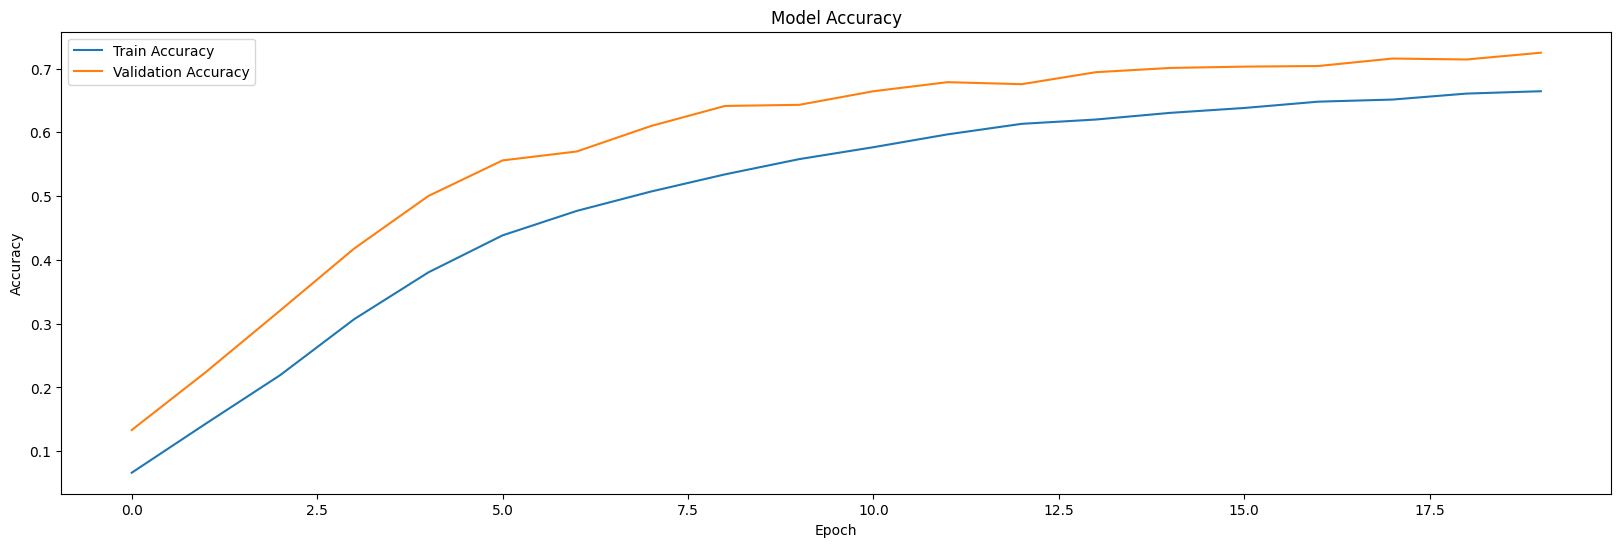

In [ ]:
plt.figure(figsize=(20,6))
plt.plot(history1.history['accuracy'], label='Train Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

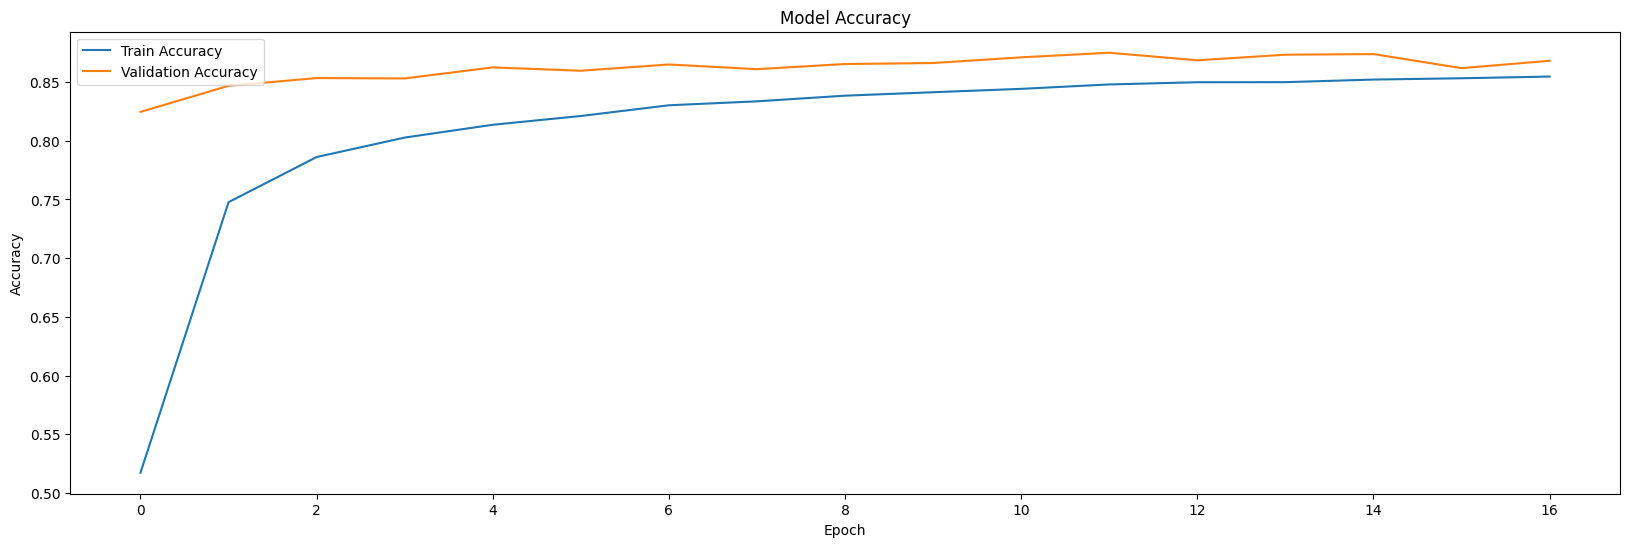

In [ ]:
plt.figure(figsize=(20,6))
plt.plot(history2.history['accuracy'], label='Train Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

In [ ]:
image_test = rotate_image(image)


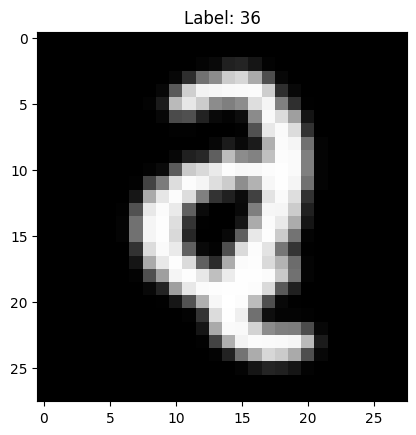

In [ ]:
plt.imshow(image_test, cmap='gray')
plt.title(f'Label: {label}')
plt.show()

In [ ]:
image_test = image_test.reshape(-1, 28, 28, 1)
result = model.predict(image_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


In [ ]:
np.argmax(result)

36

In [ ]:
image2 = train_data.iloc[2, 1:].values.reshape(28, 28)
label2 = train_data.iloc[2,0]

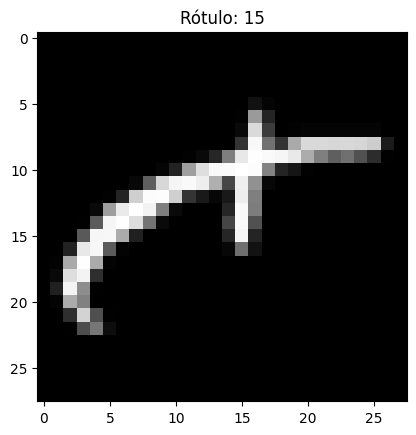

In [ ]:
plt.imshow(image2, cmap='gray')
plt.title(f'Rótulo: {label2}')
plt.show()

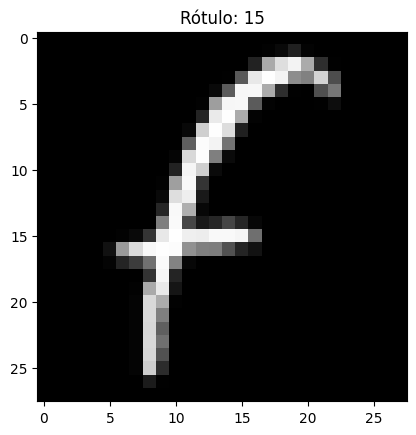

In [ ]:
image2_test = rotate_image(image2)
plt.imshow(image2_test, cmap='gray')
plt.title(f'Rótulo: {label2}')
plt.show()

In [ ]:
image2_test = image2_test.reshape(-1, 28, 28, 1)
image2_pred = model.predict(image2_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [ ]:
np.argmax(image2_pred)

15